# Plot XAI evaluation skill scores & spyder plot
- Python Notebook to generate Plots include in Figures 8-10a (see Section 4b - d in **["Finding the right XAI Method --- A Guide for the Evaluation and Ranking of Explainable AI Methods in Climate Science](https://arxiv.org/abs/2303.00652)**)
- For execution via Colab:
    - 1.) create colab account
    - 2.) sync to colab drive (use colab app) and create shortcut in google drive (right click -> organise -> shortcut)
    - 3.) adapt paths in 'Preliminaries'


In [75]:
!pip install pandas==1.5.3
!pip install numpy==1.21.0
!pip install matplotlib==3.5.3
!pip install seaborn
!pip install xarray

In [76]:
"Import functions"
import sys
import os
import copy
import yaml
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr

Mounted at /content/drive/


In [ ]:
%%capture
# Install a local package.
!pip install -e /content/drive/MyDrive/Climate_X_Quantus/QuantusClimate/. --user

In [ ]:
%%capture
!pip freeze

In [ ]:
%%capture
# Import local package.
import sys
sys.path.insert(0,'/content/drive/My Drive/Climate_X_Quantus/')
import QuantusClimate as quantus

## Preliminaries
- Set raw_path to general data path
- Set data_path to path of evaluation result data
- Set plot_path to Figures path


In [78]:
# Set paths.

raw_path = '/content/drive/MyDrive/Climate_X_Quantus/Data/'
data_path = '/content/drive/MyDrive/Climate_X_Quantus/Data/Quantus/Baseline/'
plot_path = '/content/drive/MyDrive/Climate_X_Quantus/Figures/'

['AvgSensitivity' 'LocalLipschitzEstimate']
['FaithfulnessCorrelation' 'ROAD']
['Complexity:Complexity' 'Complexity:Sparseness' 'Localisation:TopK'
 'Localisation:RRA' 'Randomisation' 'RandomLogit']


## Explanation methods comparison (Section 4b)

In [ ]:
# Load and unpack data.

rob_mean_all = np.load(data_path + 'bss_Robustness_0_abs_agg_scores_xai_9_MLP.npz', allow_pickle = True)
print(rob_mean_all['properties'])
rob_mean_all = rob_mean_all['mean']
rob_SEM_all = np.load(data_path + 'bss_Robustness_0_SEM_scores_xai_9_MLP.npz', allow_pickle = True)
rob_SEM_all = rob_SEM_all['sem']

faith_mean_all = np.load(data_path + 'bss_Faithfulness_0_abs_agg_scores_xai_9_MLP.npz', allow_pickle = True)
print(faith_mean_all['properties'])
faith_mean_all = faith_mean_all['mean']
faith_SEM_all = np.load(data_path + 'bss_Faithfulness_0_SEM_scores_xai_9_MLP.npz', allow_pickle = True)
faith_SEM_all = faith_SEM_all['sem']

comp_mean_all = np.load(data_path + 'bss_Complexity_0_abs_agg_scores_xai_9_MLP.npz', allow_pickle = True)
print(comp_mean_all['properties'])
comp_mean_all = comp_mean_all['mean']
comp_SEM_all = np.load(data_path + 'bss_Complexity_0_SEM_scores_xai_9_MLP.npz', allow_pickle = True)
xai_methods = comp_SEM_all['xai']
comp_SEM_all = comp_SEM_all['sem']


In [79]:
# Load and unpack SHAP data.


rob_mean_shap = np.load(data_path + 'Shap/' + 'bss_Robustness_0_abs_agg_scores_xai_1_MLP.npz', allow_pickle = True)
rob_mean_shap = rob_mean_shap['mean']
rob_SEM_shap = np.load(data_path + 'Shap/' + 'bss_Robustness_0_SEM_scores_xai_1_MLP.npz', allow_pickle = True)
rob_SEM_shap = rob_SEM_shap['sem']

faith_mean_shap = np.load(data_path + 'Shap/' + 'bss_Faithfulness_0_abs_agg_scores_xai_1_MLP.npz', allow_pickle = True)
faith_mean_shap = faith_mean_shap['mean']
faith_SEM_shap = np.load(data_path + 'Shap/' + 'bss_Faithfulness_0_SEM_scores_xai_1_MLP.npz', allow_pickle = True)
faith_SEM_shap = faith_SEM_shap['sem']

comp_mean_shap = np.load(data_path + 'Shap/' + 'bss_Complexity_0_abs_agg_scores_xai_1_MLP.npz', allow_pickle = True)
comp_mean_shap = comp_mean_shap['mean']
comp_SEM_shap = np.load(data_path + 'Shap/' + 'bss_Complexity_0_SEM_scores_xai_1_MLP.npz', allow_pickle = True)
xai_methods_shap = comp_SEM_shap['xai']
comp_SEM_shap = comp_SEM_shap['sem']


In [80]:
# Concatenate.
rob_mean = np.concatenate((rob_mean_all, rob_mean_shap), axis=0)
faith_mean = np.concatenate((faith_mean_all, faith_mean_shap), axis=0)
comp_mean = np.concatenate((comp_mean_all, comp_mean_shap), axis=0)

rob_SEM = np.concatenate((rob_SEM_all, rob_SEM_shap), axis=0)
faith_SEM = np.concatenate((faith_SEM_all, faith_SEM_shap), axis=0)
comp_SEM = np.concatenate((comp_SEM_all, comp_SEM_shap), axis=0)

In [81]:
# Create plot data.

xai = []
for methods in xai_methods:
  xai.append(methods)

xai[0] = 'gradients'
xai[1] = 'SmoothGrad'
xai[2] = 'input times gradients'
xai[3] = 'Integrated Gradients'
xai[6] = 'NoiseGrad'
xai[7] = 'FusionGrad'
xai.append('DeepShap')
xai[8] = "Random Baseline"

properties = ['Robustness','Robustness','Faithfulness', 'Faithfulness','Complexity', 'Complexity','Localization', 'Localization', 'Randomization', 'Randomization']
metrics = ['Average Sensitivity','Local Lipschitz Estimate', 'Faithfulness Correlation', 'ROAD','Complexity','Sparseness','Top-K ', 'Relevance Rank Accuracy','Model Parameter Randomization Test','Random Logit']

mean_array = np.concatenate((rob_mean, faith_mean, comp_mean), axis=1)
sem_array = np.concatenate((rob_SEM, faith_SEM, comp_SEM), axis=1)

# data to data frame.
mean_data = pd.DataFrame(data=mean_array, index = xai, columns=pd.MultiIndex.from_tuples(zip(properties,metrics)))
sem_data = pd.DataFrame(data=sem_array, index = xai, columns=pd.MultiIndex.from_tuples(zip(properties,metrics)))


In [82]:
# Re-ordering array.
xai[0] = 'gradients'
xai[1] = 'SmoothGrad'
xai[2] = 'NoiseGrad'
xai[3] = 'FusionGrad'
xai[4] = 'input times gradients'
xai[5] = 'Integrated Gradients'
xai[6] = 'LRPab'
xai[7] = 'LRPz'
xai[8] = 'DeepShap'
xai[9] = 'Random Baseline'
mean_data = mean_data.reindex(xai)
sem_data = sem_data.reindex(xai)

mean_array = mean_data.values
sem_array = sem_data.values

# Save plot data.
np.savez(data_path + 'BaselineTest_mean.npz', mean = mean_array, xai = xai, metrics = metrics, properties = properties)
np.savez(data_path + 'BaselineTest_sem.npz', sem = sem_array, xai = xai, metrics = metrics, properties = properties)

In [83]:
mean_data.style

In [84]:
sem_data.style

## Bar Plot

- Creates barplot displayed in Figure 8 see Section 4b

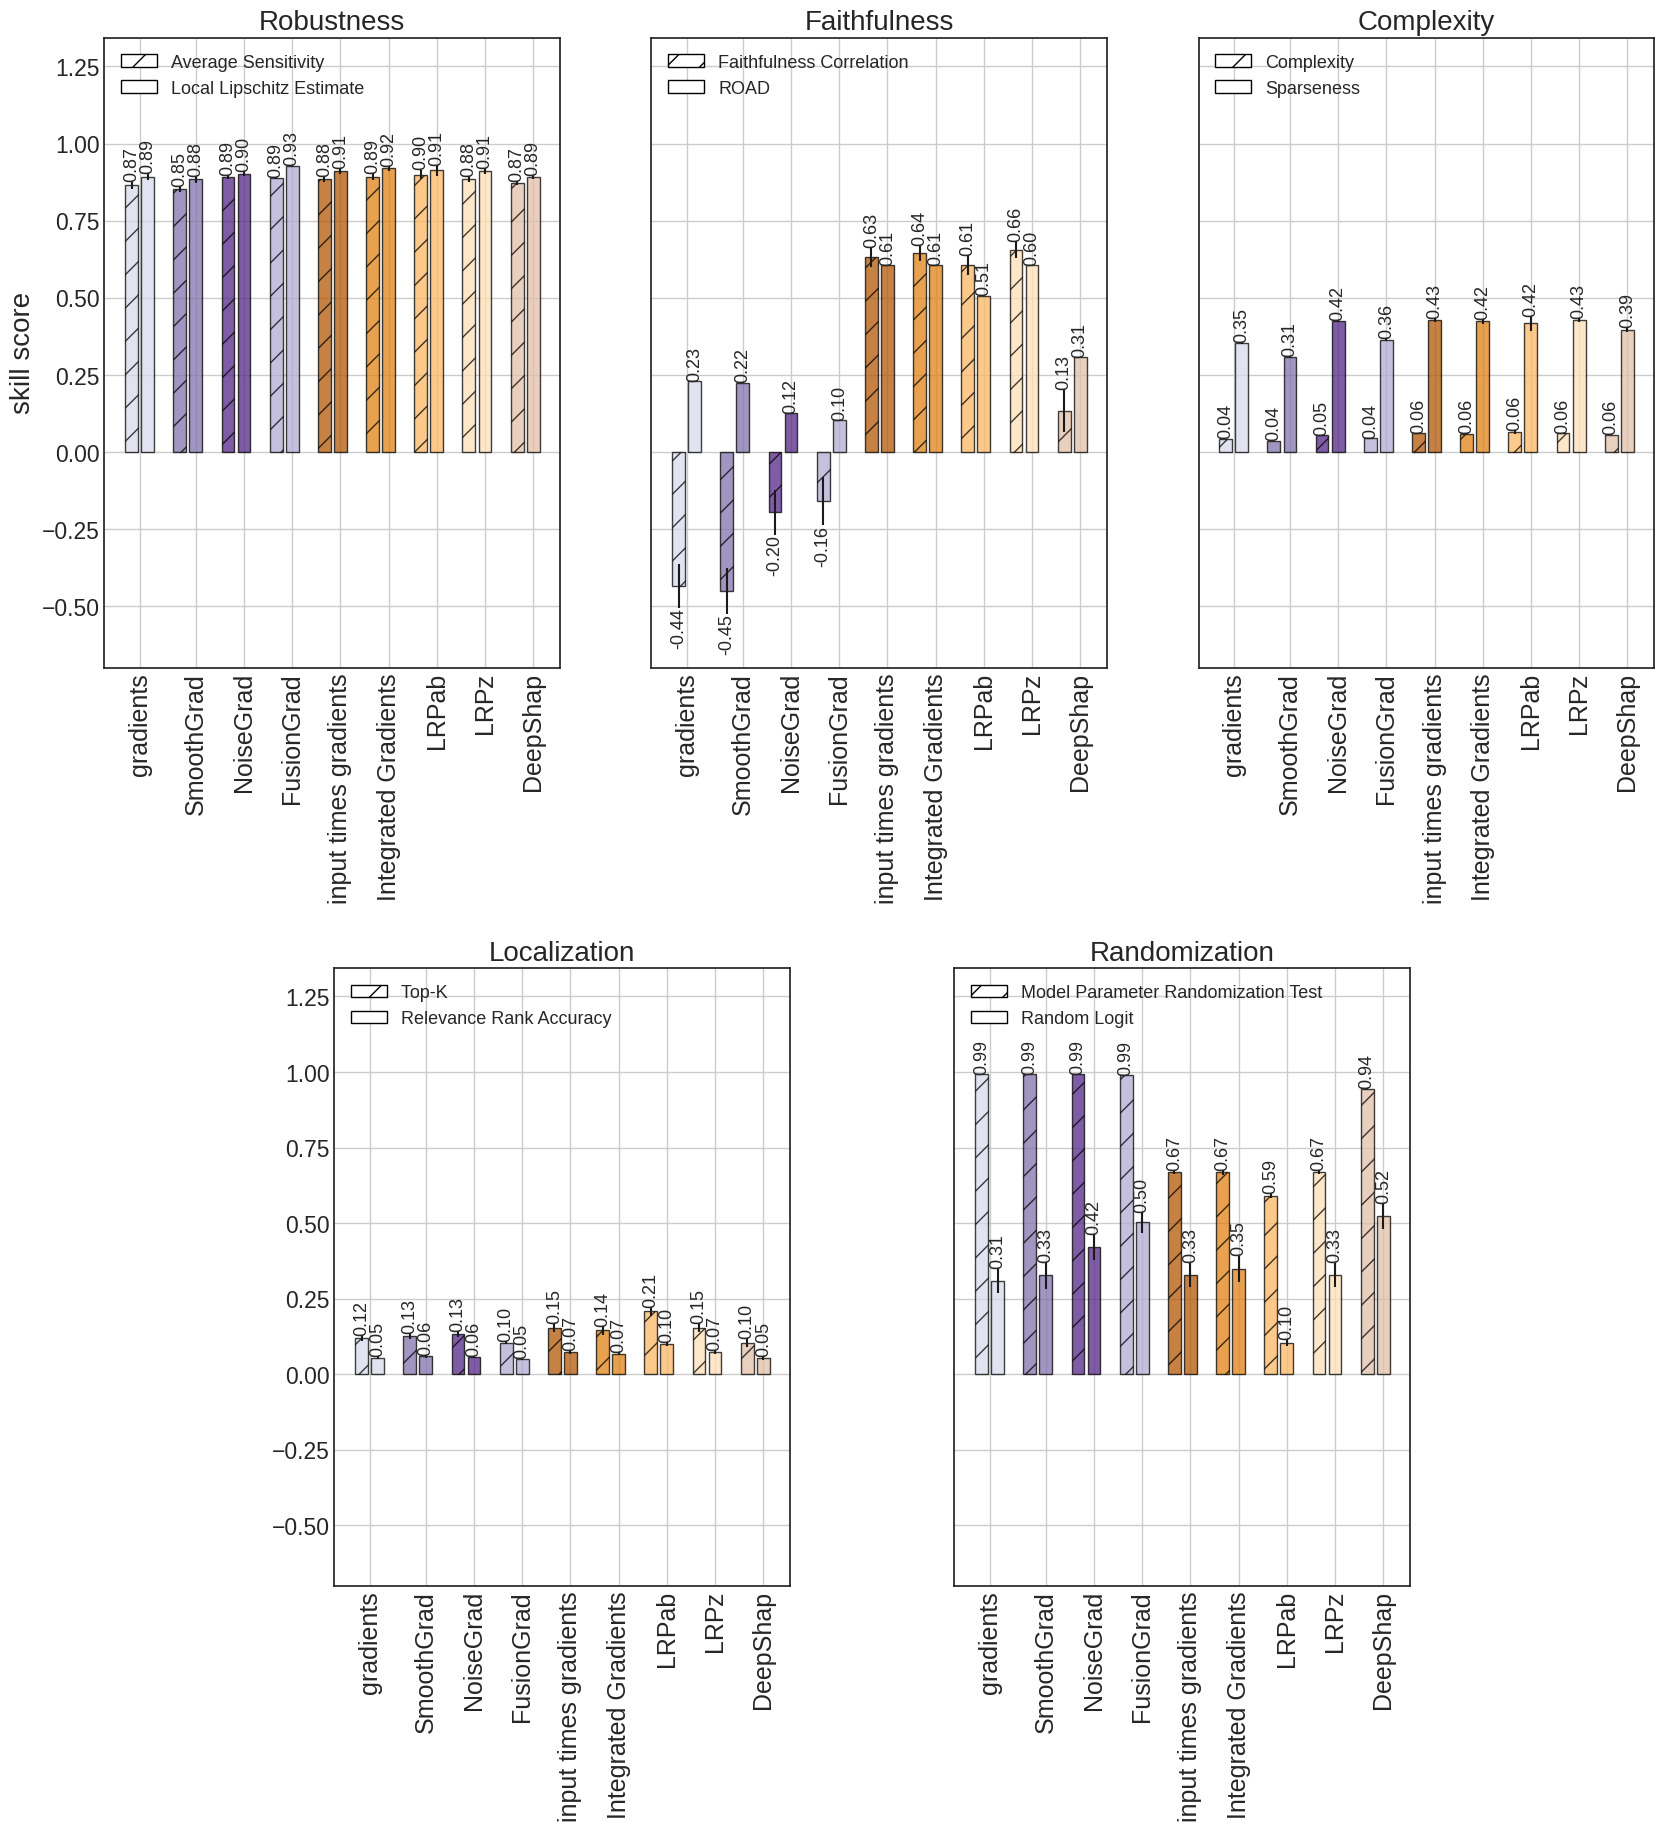

In [87]:

# Construct figure.
fig, axes = plt.subplots(2,3, sharey=True, figsize=(20,18))

# Config. plot arrangement.
axes[1][2].set_visible(False)
axes[1][0].set_position([0.24,0.02,0.228,0.343])
axes[1][1].set_position([0.55,0.02,0.228,0.343])

rows = [0,0,0,1,1]
cols = [0,1,2,0,1]

# Plot config.
colors1 = ['#d8daeb','#8073ac','#542788','#b2abd2','#b35806','#e08214','#fdb863','#fee0b6','#E1C0A8','#663300']

num_x = len(xai) - 1

k = 0
for j, met in enumerate(metrics):
  if not j%2:
    ax = axes[rows[k],cols[k]]
    nr_datasets = 2
    nr_datasets = 2
    colours_repeat = np.repeat(colors1, repeats=nr_datasets)
    legend_elements = [
        matplotlib.patches.Patch(facecolor="white", edgecolor="black", hatch="/"),
        matplotlib.patches.Patch(facecolor="white", edgecolor="black"),
    ]
    x = [
        0,
        1,
        3,
        4,
        6,
        7,
        9,
        10,
        12,
        13,
        15,
        16,
        18,
        19,
        21,
        22,
        24,
        25,
        # 27,
        # 28,
    ]
    labels_ticks = list(range(1, np.max(x) + 1, nr_datasets + 1))
    labels_ticks[0] = 0.5

    # Plot!
    l = j
    means = np.dstack((mean_array[:num_x,l], mean_array[:num_x,l+1])).flatten()
    stds = np.dstack((sem_array[:num_x,l], sem_array[:num_x,l+1])).flatten()
    barlist = ax.bar(x, means, yerr=stds, alpha=0.75, edgecolor="black")

    # Alt 1.
    ax.bar_label(barlist, fmt="%.2f", label_type="edge", fontsize=13, rotation=90)

    # Fix the harches.
    for i in range(0, num_x * nr_datasets, nr_datasets):
        barlist[i].set_hatch("/")
    for i in range(1, num_x * nr_datasets, nr_datasets):
        barlist[i].set_hatch("")
    for i in range(0, num_x  * nr_datasets):
        barlist[i].set_color(colours_repeat[i])
    for i in range(num_x  * nr_datasets):
        barlist[i].set_edgecolor("black")

    # Set the labels and titles.
    ax.set_xticks(ticks=labels_ticks, labels=xai[:num_x], fontsize=18, rotation=90)
    if k == 0:
      ax.set_ylabel('skill score', fontsize=20)

    ax.set_ylim(-0.7, np.max(means) + 0.35)
    ax.legend(
        handles=legend_elements,
        labels=[metrics[j],metrics[j+1]],
        fontsize=13,
        loc="upper left",
    )
    ax.set_title(properties[l], fontsize=20)
    ax.grid()

    k += 1

    # Configs for barplot.

plt.show()

fig.savefig(plot_path + 'Metrics_Comparison_Skill_Barplot.png', dpi=600, bbox_inches='tight')

# Network Comparison Plot (Section 4c)

In [88]:
# Define parameters.

props = ['Robustness','Faithfulness','Complexity','Localization', 'Randomization']

network = np.repeat(np.array(['MLP','CNN'])[:,np.newaxis],repeats = 5,axis =1)
network = np.dstack((network[0,:], network[1,:])).flatten()
properties = np.repeat(props, repeats = int(len(network)/len(props)))


In [89]:
# Create MLP spyder plot data.
metricX = ['Average Sensitivity','Local Lipschitz Estimate', 'Faithfulness Correlation', 'ROAD','Complexity','Sparseness','TopK', 'Relevance Rank Accuracy','Model Parameter Randomization Test','Random Logit']
sem_mlp = []
mean_mlp = []
for j, met in enumerate(metricX):
  if met in ['Local Lipschitz Estimate', 'ROAD', 'Sparseness', 'TopK','Model Parameter Randomization Test']:
    sem_mlp.append(sem_array[:,j])
    mean_mlp.append(mean_array[:,j])

sem_mlp = np.array(sem_mlp).T
mean_mlp = np.array(mean_mlp).T


# Adjust to CNN data shape because of additional method in CNN.
sem_mlp = np.insert(sem_mlp, 8, np.nan, axis = 0) #np.insert(sem_mlp, 6, 0, axis = 0)
mean_mlp = np.insert(mean_mlp, 8, np.nan, axis = 0) #np.insert(mean_mlp, 6, 0, axis = 0)


In [91]:
# Load CNN data.


rob_mean_all_cnn = np.load(data_path + 'bss_Robustness_0_abs_agg_scores_xai_10_CNN.npz', allow_pickle = True)
print(rob_mean_all_cnn['properties'])
rob_mean_all_cnn = rob_mean_all_cnn['mean']
rob_SEM_all_cnn = np.load(data_path + 'bss_Robustness_0_SEM_scores_xai_10_CNN.npz', allow_pickle = True)
rob_SEM_all_cnn = rob_SEM_all_cnn['sem']

faith_mean_all_cnn = np.load(data_path + 'bss_Faithfulness_0_abs_agg_scores_xai_10_CNN.npz', allow_pickle = True)
print(faith_mean_all_cnn['properties'])
faith_mean_all_cnn = faith_mean_all_cnn['mean']
faith_SEM_all_cnn = np.load(data_path + 'bss_Faithfulness_0_SEM_scores_xai_10_CNN.npz', allow_pickle = True)
faith_SEM_all_cnn = faith_SEM_all_cnn['sem']

comp_mean_all_cnn = np.load(data_path + 'bss_Complexity_0_abs_agg_scores_xai_10_CNN.npz', allow_pickle = True)
print(comp_mean_all_cnn['properties'])
comp_mean_all_cnn = comp_mean_all_cnn['mean']
comp_SEM_all_cnn = np.load(data_path + 'bss_Complexity_0_SEM_scores_xai_10_CNN.npz', allow_pickle = True)
xai_meth = comp_SEM_all_cnn['xai']
comp_SEM_all_cnn = comp_SEM_all_cnn['sem']


['LocalLipschitzEstimate']
['FaithfulnessCorrelation' 'ROAD']


FileNotFoundError: ignored

In [ ]:
Load CNN shap data.


rob_mean_shap_cnn = np.load(data_path + 'Shap/' + 'bss_Robustness_0_abs_agg_scores_xai_1_CNN.npz', allow_pickle = True)
print(rob_mean_shap_cnn['properties'])
rob_mean_shap_cnn = rob_mean_shap_cnn['mean']
rob_SEM_shap_cnn = np.load(data_path + 'Shap/' + 'bss_Robustness_0_SEM_scores_xai_1_CNN.npz', allow_pickle = True)
rob_SEM_shap_cnn = rob_SEM_shap_cnn['sem']

faith_mean_shap_cnn = np.load(data_path + 'Shap/' + 'bss_Faithfulness_0_abs_agg_scores_xai_1_CNN.npz', allow_pickle = True)
print(faith_mean_shap_cnn['properties'])
faith_mean_shap_cnn = faith_mean_shap_cnn['mean']
faith_SEM_shap_cnn = np.load(data_path + 'Shap/' + 'bss_Faithfulness_0_SEM_scores_xai_1_CNN.npz', allow_pickle = True)
faith_SEM_shap_cnn = faith_SEM_shap_cnn['sem']

comp_mean_shap_cnn = np.load(data_path + 'Shap/' + 'bss_Complexity_0_abs_agg_scores_xai_1_CNN.npz', allow_pickle = True)
print(comp_mean_shap_cnn['properties'])
comp_mean_shap_cnn = comp_mean_shap_cnn['mean']
comp_SEM_shap_cnn = np.load(data_path + 'Shap/' + 'bss_Complexity_0_SEM_scores_xai_1_CNN.npz', allow_pickle = True)
comp_SEM_shap_cnn = comp_SEM_shap_cnn['sem']



In [ ]:
# Concatenate.
rob_mean_cnn = np.concatenate((rob_mean_all_cnn, rob_mean_shap_cnn), axis=0)
faith_mean_cnn = np.concatenate((faith_mean_all_cnn, faith_mean_shap_cnn), axis=0)
comp_mean_cnn = np.concatenate((comp_mean_all_cnn, comp_mean_shap_cnn), axis=0)

rob_SEM_cnn = np.concatenate((rob_SEM_all_cnn, rob_SEM_shap_cnn), axis=0)
faith_SEM_cnn = np.concatenate((faith_SEM_all_cnn, faith_SEM_shap_cnn), axis=0)
comp_SEM_cnn = np.concatenate((comp_SEM_all_cnn, comp_SEM_shap_cnn), axis=0)

In [ ]:
# Set data and frames.

xai_n = []
for methods in xai_meth:
  xai_n.append(methods)

xai_n[0] = 'gradients'
xai_n[1] = 'SmoothGrad'
xai_n[2] = 'input times gradients'
xai_n[3] = 'Integrated Gradients'
xai_n[7] = 'NoiseGrad'
xai_n[8] = 'FusionGrad'
xai_n[9] = "Random Baseline"
xai_n.append('DeepShap')

propCNN = ['Robustness','Faithfulness', 'Faithfulness','Complexity', 'Complexity','Localization', 'Localization', 'Randomization']
metCNN = ['Local Lipschitz Estimate', 'Faithfulness Correlation', 'ROAD','Complexity','Sparseness','Top-K ', 'Relevance Rank Accuracy','Model Parameter Randomization Test']

mean_array_c = np.concatenate((rob_mean_cnn, faith_mean_cnn, comp_mean_cnn), axis=1)
sem_array_c = np.concatenate((rob_SEM_cnn, faith_SEM_cnn, comp_SEM_cnn), axis=1)

# data to data frame.
mean_data_c = pd.DataFrame(data=mean_array_c, index = xai_n, columns=pd.MultiIndex.from_tuples(zip(propCNN,metCNN)))
sem_data_c = pd.DataFrame(data=sem_array_c, index = xai_n, columns=pd.MultiIndex.from_tuples(zip(propCNN,metCNN)))


In [ ]:
# Re-ordering array.
xai_n[0] = 'gradients'
xai_n[1] = 'SmoothGrad'
xai_n[2] = 'NoiseGrad'
xai_n[3] = 'FusionGrad'
xai_n[4] = 'input times gradients'
xai_n[5] = 'Integrated Gradients'
xai_n[6] = 'LRPab'
xai_n[7] = 'LRPz'
xai_n[8] = 'LRPcomp'
xai_n[9] = 'DeepShap'
xai_n[10] = 'Random Baseline'
mean_data_c = mean_data_c.reindex(xai_n)
sem_data_c = sem_data_c.reindex(xai_n)

mean_array_c = mean_data_c.values
sem_array_c = sem_data_c.values

# Save plot data.
np.savez(data_path + 'BaselineTest_mean_cnn.npz', mean = mean_array_c, xai = xai_n, metrics = metCNN, properties = propCNN)
np.savez(data_path + 'BaselineTest_sem_cnn.npz', sem = sem_array_c, xai = xai_n, metrics = metCNN, properties = propCNN)

In [ ]:
# Create MLP spyder plot data.
metricCNN = ['Local Lipschitz Estimate', 'Faithfulness Correlation', 'ROAD','Complexity','Sparseness','TopK', 'Relevance Rank Accuracy','Model Parameter Randomization Test']


sem_cnn = []
mean_cnn = []
for j, met in enumerate(metricCNN):
  if met in ['Local Lipschitz Estimate', 'ROAD', 'Sparseness', 'TopK','Model Parameter Randomization Test']:
    sem_cnn.append(sem_array_c[:,j])
    mean_cnn.append(mean_array_c[:,j])
sem_cnn = np.array(sem_cnn).T
mean_cnn = np.array(mean_cnn).T

In [ ]:
# Configure plot data.
mean_network = np.dstack((mean_mlp, mean_cnn)).reshape(11,10)
sem_network = np.dstack((sem_mlp, sem_cnn)).reshape(11,10)

print(properties, network)
mean_scores = pd.DataFrame(data=mean_network, index = xai_n[:], columns=pd.MultiIndex.from_tuples(zip(properties,network)))
sem_scores = pd.DataFrame(data=sem_network, index = xai_n[:], columns=pd.MultiIndex.from_tuples(zip(properties,network)))

mean_network = mean_scores.values
sem_network = sem_scores.values

# Save plot data.
np.savez(data_path + 'mean_network.npz', mean = mean_scores, xai = xai_n, metrics = network, properties = properties)
np.savez(data_path + 'sem_network.npz', sem = sem_scores, xai = xai_n, metrics = network, properties = properties)


In [ ]:
mean_scores.style

In [ ]:
sem_scores.style

In [ ]:

# Construct figure.
fig, axes = plt.subplots(2,3, sharey=True, figsize=(22,20))

# Config. plot arrangement.
axes[1][2].set_visible(False)
axes[1][0].set_position([0.24,0.02,0.228,0.343])
axes[1][1].set_position([0.55,0.02,0.228,0.343])

rows = [0,0,0,1,1]
cols = [0,1,2,0,1]

# Plot config.
colors1 = ['#d8daeb','#8073ac','#542788','#b2abd2','#b35806','#e08214','#fdb863','#fee0b6','#E1C0A8','#663300']

num_x = len(xai) - 1

k = 0
for j, met in enumerate(network):
  if not j%2:
    ax = axes[rows[k],cols[k]]
    nr_datasets = 2
    colours_repeat = np.repeat(colors1, repeats=nr_datasets)
    legend_elements = [
        matplotlib.patches.Patch(facecolor="white", edgecolor="black", hatch="*"),
        matplotlib.patches.Patch(facecolor="white", edgecolor="black"),
    ]
    x = [
        0,
        1,
        3,
        4,
        6,
        7,
        9,
        10,
        12,
        13,
        15,
        16,
        18,
        19,
        21,
        22,
        24,
        25,
        27,
        28,
    ]
    labels_ticks = list(range(1, np.max(x) + 1, nr_datasets + 1))
    labels_ticks[0] = 0.5

    # Plot!
    l = j
    means = np.dstack((mean_network[:10,l], mean_network[:10,l+1])).flatten()
    stds = np.dstack((sem_network[:10,l], sem_network[:10,l+1])).flatten()
    barlist = ax.bar(x, means, yerr=stds, alpha=0.75, edgecolor="black")
    # means_0 = copy.deepcopy(means)
    # means_0[means_0 < 0] = 0.000001
    # barlist = ax.bar(x, means_0, yerr=stds, alpha=0.75, edgecolor="black")

        # Alt 1.
    ax.bar_label(barlist, means.round(decimals=2), fmt="%.2f", label_type="edge",padding = 4, fontsize=14, rotation=90)

    # Fix the harches.
    for i in range(0, len(xai_n[:10]) * nr_datasets, nr_datasets):
        barlist[i].set_hatch("*")
    for i in range(1, len(xai_n[:10]) * nr_datasets, nr_datasets):
        barlist[i].set_hatch("")
    for i in range(0, len(xai_n[:10]) * nr_datasets):
        barlist[i].set_color(colours_repeat[i])
    for i in range(len(xai_n[:10]) * nr_datasets -1 ):
        barlist[i].set_edgecolor("black")

    # Set the labels and titles.
    ax.set_xticks(ticks=labels_ticks, labels=xai_n[:10], fontsize=18, rotation=90)
    if k == 0:
      ax.set_ylabel('skill score', fontsize=20)

    ax.set_ylim(- 0.1, np.nanmax(means) + 0.3)
    ax.legend(
        handles=legend_elements,
        labels=[network[j],network[j+1]],
        fontsize=14,
        loc="upper left",
    )
    # ax.set_title("%s \n (%s)" %(properties[j],sub_metrics[rows[k]]), fontsize=20)
    ax.set_title("%s \n" %(properties[l]), fontsize=20)
    if k == 0:
      ax.text(5.5,1.32,'(%s)'%sub_metrics[k], fontsize=15)
    elif k == 1:
      ax.text(11.2,1.32,'(%s)'%sub_metrics[k], fontsize=15)
    elif k == 2:
      ax.text(9.2,1.32,'(%s)'%sub_metrics[k], fontsize=15)
    elif k == 3:
      ax.text(10.6,1.32,'(%s)'%sub_metrics[k], fontsize=15)
    elif k == 4:
      ax.text(0,1.32,'(%s)'%sub_metrics[k], fontsize=15)
    ax.grid()
    k += 1
    # Configs for barplot.

plt.show()

fig.savefig(plot_path + 'Network_Comparison_Skill_Barplot.png', dpi=600, bbox_inches='tight')

# Spyder Plot (Section 4d, Figure 10a)

In [ ]:
%%capture
# @title Plotting functionality

# Plotting specifics.
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

# Plotting configs.
sns.set(font_scale=1.5)
plt.style.use('seaborn-white')
plt.rcParams['ytick.labelleft'] = True
plt.rcParams['xtick.labelbottom'] = True

include_titles = True
include_legend = True

# Source code: https://matplotlib.org/stable/gallery/specialty_plots/radar_chart.html.

def spyder_plot(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.
    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default."""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default."""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels, angles=None):
            self.set_thetagrids(angles=np.degrees(theta), labels=labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def draw(self, renderer):
            """ Draw. If frame is polygon, make gridlines polygon-shaped."""
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)


        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)

                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

In [ ]:
# Create MLP spyder plot data.
sp_d = []
for j, met in enumerate(metricX):
  if met in ['Local Lipschitz Estimate', 'ROAD', 'Sparseness', 'TopK','Model Parameter Randomization Test']:
    sp_d.append(mean_array[:num_x,j])
sp_d = np.array(sp_d).T

# data to data frame.
spyder_data = pd.DataFrame(data=sp_d, index = xai[:num_x], columns= ['Robustness','Faithfulness', 'Complexity', 'Localisation', 'Randomisation'])


sp_dt = []
for j, met in enumerate(metricX):
  if met in ['Local Lipschitz Estimate', 'ROAD', 'Sparseness', 'TopK' ,'Model Parameter Randomization Test']:
    sp_dt.append(mean_array[:,j])
sp_dt = np.array(sp_dt).T

# data to data frame.
spy_data = pd.DataFrame(data=sp_dt, index = xai[:], columns= ['Robustness','Faithfulness', 'Complexity', 'Localisation', 'Randomisation'])


In [ ]:

# Make spyder graph!
colors1 = ['#d8daeb','#8073ac','#542788','#b2abd2','#b35806','#e08214','#fdb863','#fee0b6','#663300']
net = 0
data = [spyder_data.columns.values, (spyder_data.to_numpy())]
theta = spyder_plot(len(data[0]), frame='polygon')
spoke_labels = data.pop(0)

fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(projection='radar'))
fig.subplots_adjust(top=0.85, bottom=0.05)
for i, (d, method) in enumerate(zip(data[0], xai[:num_x])):
    if "Random" in xai[i]:
        line = ax.plot(theta, d, label=xai[i], color='b', linewidth=5.0,)
        ax.fill(theta, d, alpha=0.15)
    elif "LRPcomp" in xai[i]:
        line = ax.plot(theta, d, label=xai[i], color= '#b2abd2', linewidth=3.)
        net = 1
    else:
        if net and i >5:
            i -=1
        line = ax.plot(theta, d, label=method, color=colors1[i%len(colors1)], linewidth=3.)
        ax.fill(theta, d, alpha=0.15)


# Set lables.
# ax.set_varlabels(labels=['Robustness', 'Faithfulness           \n', '\nComplexity', '\nLocalisation', '               Randomisation\n'])
ax.set_varlabels(labels=[])

ax.set_rgrids(np.arange(0, spyder_data.values.max() + 0.1,0.1), labels=[])

# Put a legend to the right of the current axis.
ax.legend(loc='upper left', bbox_to_anchor=(1, 0.5))

plt.show()

fig.savefig(plot_path + 'Spyder_Plot_Skill_MLP.png', dpi=600, bbox_inches='tight')

